# Pollard Rho

In [1]:
import time
import matplotlib.pyplot as plt
import random
import sympy
import pprint
import numpy as np

In [2]:


def gcd(a, b):
    if b == 0:
        return a  # Base case: GCD is the remaining non-zero number
    else:
        return gcd(b, a % b)

In [3]:

def pollard_rho(n):
    if n % 2 == 0:
        return 2

    x = 2  # Starting value
    y = 2  # Second starting value
    d = 1  # Placeholder for potential factor

    while d == 1:
        x = pow(x, 2, n) + 1  # Modified function for better cycle detection
        y = pow(y, 2, n) + 1
        y = pow(y, 2, n) + 1
        d = gcd(abs(x - y), n)

    if d == n:
        return None  # No non-trivial factor found
    else:
        return d

# Example usage


In [4]:
number_to_factor = 104034233
factor = pollard_rho(number_to_factor)
if factor:
    print("Factor found:", factor)
else:
    print("No factor found within a reasonable time.")


Factor found: 31


In [5]:
number_to_factor/31

3355943.0

# Pollard Rho compare

## Utils

In [6]:
def trial_division(n):
    factors = []
    divisor = 2
    while n > 1:
        while n % divisor == 0:
            factors.append(divisor)
            n //= divisor
        divisor += 1
    return factors


def ecm_factorization(n, B=20, max_steps=1000):
    x = 2
    y = 2
    d = 1
    steps = 0

    while d == 1 and steps < max_steps:
        x = (x**2 + 1) % n
        y = ((y**2 + 1)**2 + 1) % n
        d = gcd(abs(x - y), n)
        steps += 1

    if d == n:
        return None  # ECM failed
    return d

In [7]:
def trial_division_time(n):
    start_time = time.time()
    factors = trial_division(n)
    end_time = time.time()
    return factors, end_time - start_time

def pollards_rho_time(n):
    start_time = time.time()
    factor = pollard_rho(n)
    end_time = time.time()
    return factor, end_time - start_time

def ecm_factorization_time(n):
    start_time = time.time()
    factor = ecm_factorization(n)
    end_time = time.time()
    return factor, end_time - start_time

n = 894217005052099  # Replace with the number you want to factorize

# Trial Division
trial_div_factors, trial_div_time = trial_division(n)
print(f"Trial Division Factors: {trial_div_factors}")
print(f"Time taken by Trial Division: {trial_div_time:.6f} seconds\n")

# Pollard's Rho
rho_factor, rho_time = pollards_rho_time(n)
print(f"Pollard's Rho Factor: {rho_factor}")
print(f"Time taken by Pollard's Rho: {rho_time:.6f} seconds\n")

# ECM
ecm_factor, ecm_time = ecm_factorization_time(n)
print(f"ECM Factor: {ecm_factor}")
print(f"Time taken by ECM: {ecm_time:.6f} seconds\n")


Trial Division Factors: 27645377
Time taken by Trial Division: 32345987.000000 seconds

Pollard's Rho Factor: 32345987
Time taken by Pollard's Rho: 0.017394 seconds

ECM Factor: 1
Time taken by ECM: 0.007479 seconds



In [66]:
def generate_semiprime(bits):
    # Generate two random prime numbers
    p = random_prime(bits)
    q = random_prime(bits)

    # Calculate the semiprime
    n = p * q

    return n, p, q

def random_prime(bits):
    # Generate a random odd number with the specified number of bits
    num = random.getrandbits(bits)
    num |= (1 << bits - 1) | 1

    # Keep generating odd numbers until a prime is found
    while not sympy.isprime(num):
        num += 2

    return num


bits = 15  # Adjust the number of bits as needed
semiprime, p, q = generate_semiprime(bits)
composite = []
trial_div_times = np.array(np.zeros(bits))
pollard_rho_times = np.array(np.zeros(bits))
ecm_times = np.array(np.zeros(bits))


ecm_times_in = np.array(np.zeros(bits))
pollard_rho_times_in = np.array(np.zeros(bits))
trial_div_times_in = np.array(np.zeros(bits))

for itter in range(5):
  pollard_rho_times = np.sum([pollard_rho_times_in, pollard_rho_times ],axis=0)
  ecm_times = np.sum([ecm_times_in , ecm_times], axis=0)
  trial_div_times = np.sum([trial_div_times_in , trial_div_times], axis=0)

  ecm_times_in = np.array([])
  pollard_rho_times_in = np.array([])
  trial_div_times_in = np.array([])
  composite = []
  for i in range(bits):
      semiprime, p, q = generate_semiprime(i+3)
      composite.append(semiprime)

      # trial_div_factors, trial_div_time = trial_division_time(semiprime)
      # trial_div_times = np.append(trial_div_times, [trial_div_time])


      rho_factor, rho_time = pollards_rho_time(semiprime)
      pollard_rho_times_in = np.append(pollard_rho_times_in, [rho_time], axis=0)

      ecm_factor, ecm_time = ecm_factorization_time(semiprime)
      ecm_times_in = np.append(ecm_times_in,[ecm_time],  axis=0)
      if(i<15):
        trial_div_factors, trial_div_time = trial_division_time(semiprime)
        trial_div_times_in = np.append(trial_div_times_in, [trial_div_time], axis=0)
      else:
        trial_div_times_in = np.append(trial_div_times_in, [ecm_time], axis=0)
  print(itter)
pollard_rho_times = pollard_rho_times/5
ecm_times = ecm_times/5
trial_div_times = trial_div_times/5

0
1
2
3
4


In [60]:
print(ecm_times)
print(pollard_rho_times)
print(pollard_rho_times)
print(trial_div_times)
print(composite)

[6.05583191e-06 5.96046448e-06 1.23023987e-05 1.81198120e-05
 2.25543976e-05 2.96115875e-05 5.11169434e-05 6.64234161e-05
 9.44137573e-05 1.39427185e-04 2.89487839e-04 4.81748581e-04
 5.09643555e-04 7.77292252e-04 1.14603043e-03 1.77369118e-03
 2.32324600e-03 5.76052666e-03 6.36477470e-03 6.56237602e-03
 6.53939247e-03 7.43212700e-03 8.03470612e-03 7.78002739e-03
 8.21509361e-03 8.50963593e-03 8.97502899e-03 1.07285976e-02
 9.68446732e-03]
[1.14917755e-05 1.00135803e-05 1.85966492e-05 2.87532806e-05
 3.91006470e-05 4.07218933e-05 8.40663910e-05 9.12666321e-05
 1.35612488e-04 1.82199478e-04 3.86619568e-04 6.36482239e-04
 6.53696060e-04 9.97018814e-04 1.48763657e-03 2.19068527e-03
 2.98271179e-03 8.87579918e-03 9.00473595e-03 9.91172791e-03
 1.58287048e-02 1.54810429e-02 3.38314056e-02 5.05297184e-02
 7.08880901e-02 1.09364796e-01 2.34148216e-01 1.70131207e-01
 2.92494345e-01]
[1.14917755e-05 1.00135803e-05 1.85966492e-05 2.87532806e-05
 3.91006470e-05 4.07218933e-05 8.40663910e-05 9.126

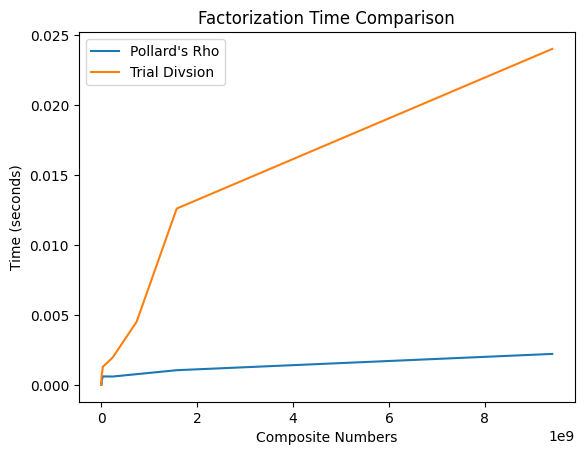

In [67]:
# plt.plot(composite, trial_div_times, label='Trial Division')
plt.plot(composite, pollard_rho_times, label="Pollard's Rho")
plt.plot(composite, trial_div_times, label='Trial Divsion')
# plt.plot(composite, ecm_times, label='ECM')

plt.xlabel('Composite Numbers')
plt.ylabel('Time (seconds)')
plt.title('Factorization Time Comparison')
plt.legend()
plt.show()

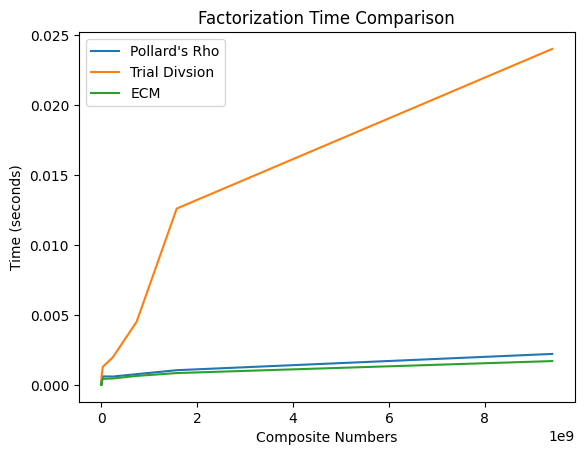

In [68]:
# plt.plot(composite, trial_div_times, label='Trial Division')
plt.plot(composite, pollard_rho_times, label="Pollard's Rho")
plt.plot(composite, trial_div_times, label='Trial Divsion')
plt.plot(composite, ecm_times, label='ECM')

plt.xlabel('Composite Numbers')
plt.ylabel('Time (seconds)')
plt.title('Factorization Time Comparison')
plt.legend()
plt.show()